# Implementing Linear Regression without sklearn Library

Objective of this notebook is to try understanding and implementing the Linear Regression (Single) without using the ML Libraries, so that we shall understand the underlying logics much clearly.

## Import Libraries

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

## Import Data

The dataset contains a simulated linear relationship between the number of hours a student studies and the marks they obtain.
Ref - https://www.kaggle.com/datasets/souradippal/simple-linear-regression-hours-vs-marks-data

In [108]:
df = pd.read_csv("Rounded_Student_Hours_Studied_vs_Marks_Dataset.csv")

## Analyse the data

In [109]:
df.describe()

,Hours_Studied,Marks
count,100.000000,100.000000
mean,5.376300,46.360200
std,2.593013,14.284805
min,1.050000,20.190000
25%,3.175000,33.675000
50%,5.565000,47.485000
75%,7.255000,57.377500
max,9.870000,73.260000


In [110]:
X = df.iloc[:, 0].values
y = df.iloc[:, -1].values

In [111]:
print(f"X Shape is {X_series.shape} and y shape is {y_series.shape}")

X Shape is (100,) and y shape is (100,)


## Splitting data for Training and Testing

Splitting the training and test data without using the sklearn model_selection library. 

In [113]:
total_data_points = X.shape[0]

Taking 80% of the data in to training and rest for testing purpose

In [114]:
train_test_split_ratio = int(math.ceil(0.8 * total_data_points))

In [115]:
X_train = X[0:train_test_split_ratio,]
y_train = y[0:train_test_split_ratio,]
X_test = X[train_test_split_ratio:, ]
y_test = y[train_test_split_ratio:, ]

In [116]:
print(f"Size of training X={X_train.shape} and y={y_train.shape}")
print(f"Size of test X={X_test.shape} and y={y_test.shape}")

Size of training X=(80,) and y=(80,)
Size of test X=(20,) and y=(20,)


## Implement Linear regression methods

### Method to calculate the linear equation formula

In [117]:
def calculate_linear_eq(w, b, x):
    '''
    Calculates the predicted output based on the coefficient and intercept for the input x variable. 
    w and b are the parameters for the linear equation
    x - single input variable (can be single value or can be an array in case of multiple variable linear regression
    '''
    return w*x + b

### Method to calculate of cost of each predicted output

In [118]:
def calculate_cost(y_predicted, y_actual):
    '''
    Cost of each predicted variable is the difference between the predicted value and the actual output
    Square of the same is returned.
    '''
    return (y_predicted - y_actual) ** 2

### Method to calculate the total cost

In [120]:
def compute_total_cost(w, b, X, y):
    '''
    w and b are the parameters of linear regression
    X - input feature variable
    y - actual output value, to be used to compare against the predicted value and use the same to calculate the cost
    '''
    total_cost = 0 #initializing the initial cost value
    
    for i in range(X.shape[0]): # iterates for each input training data
        y_predicted = calculate_linear_eq(w, b, X[i]) # determines the predicted output variable
        cost = calculate_cost(y_predicted, y[i]) # calculates cost based on the predicted value and the actual value
        total_cost = total_cost + cost
    
    total_cost = total_cost / X.shape[0]
    
    return total_cost
    
    

### Method to calculate the derivatives for w and b with respect to the cost

In [121]:
def compute_gradient_derivatives(w, b, X, y):
    '''
    Method calculates the derivatives which will be used while implementing Gradient descent to 
    identify the best coefficient and intercept. 
    '''
    total_data_points = X.shape[0]
    derivative_w = 0
    derivative_b = 0
    
    for i in range(total_data_points):
        y_predicted = calculate_linear_eq(w, b, X[i])
        cost = calculate_cost(y_predicted, y[i])
        derivative_w = derivative_w + ((y_predicted - y[i]) * X[i])
        derivative_b = derivative_b + (y_predicted - y[i])
                                       
    derivative_w = derivative_w / total_data_points
    derivative_b = derivative_b / total_data_points
    
    return derivative_w, derivative_b
                                       

### Method to determine the best fit line (w and b)

In [125]:
def fit_model(w, b, alpha, X, y, iterations):
    '''
    Method to determine the best coefficient and intercept by using gradient descent algorithm.
    After each iteration, the cost is expected to reduce. 
    When the difference in cost is less than 0.5, it is assumed that the convergence is reached
    and the iteration terminates. 
    '''
    cost_history = [] # array to store the cost for each iteration
    
    # temporary variable which shall be compared against the current iteration 
    #cost to determine if further iteration is required or not.
    prev_cost = None 
    
    for iter in range(iterations):
        cost = compute_total_cost(w, b, X, y)
        
        if prev_cost and (prev_cost - cost < 0.5):
            break
        
        prev_cost = cost
        
        cost_history.append(cost)
        derivative_w, derivative_b = compute_gradient_derivatives(w, b, X, y)
        
        w = w - alpha * derivative_w
        b = b - alpha * derivative_b
        
    return w, b, cost_history, iter
        

### Viewing the data to see how the data is distributed

Before implementing the model, lets take a look at how the data looks by plotting a scatter chart

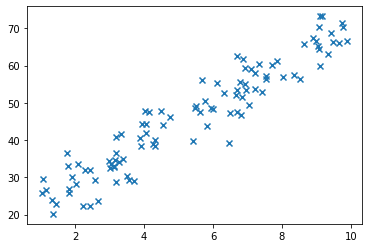

In [72]:
plt.scatter(X, y, marker='x')
plt.show()

Can see that the data seems to be a perfect fit for Linear regression.

### Visualizing the line with some random w and b value

Lets plot a sample prediction line using a random coefficient and intercept

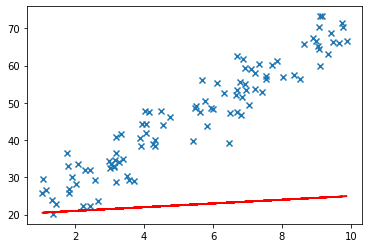

In [123]:
w = 0.5
b = 20

y_pred = []
for i in range(X_train.shape[0]):
    y_pred.append(calculate_linear_eq(w, b, X_train[i]))

plt.scatter(X, y, marker='x')
plt.plot(X_train, y_pred, color='red')
plt.show()

Can see that this does NOT seem to be a good fit line

### Determine the best fit line

- Calling the fit_model method to identify the best coefficient and intercept. 
- We shall pass the w and b with any random values. 
- alpha = learning rate - rate at which the descent has to be calculated. 
- iterations = total maximum number of iterations to run while calculating the best fit model

In [126]:
w, b , cost_history, iter = fit_model(w=-100, b=0.03, alpha=0.01, X=X_train, y=y_train, iterations=1000)

In [127]:
print(f"Best determined w = {w}, b={b} with iterations = {iter}")

Best determined w = 5.423113510901548, b=16.17025105057246 with iterations = 16


Seems like the initial w and b were good enough as the best fit model is identified in 16 iterations itself. 

### Now that the best fit coefficient and intercept is determined, lets try to fit the model again.

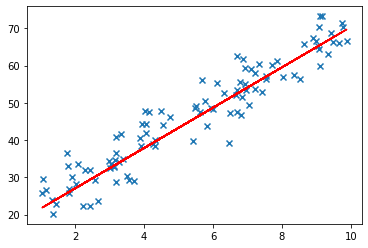

In [128]:
y_pred = []
for i in range(X_train.shape[0]):
    y_pred.append(calculate_linear_eq(w, b, X_train[i]))

plt.scatter(X, y, marker='x')
plt.plot(X_train, y_pred, color='red')
plt.show()

### Seems to be a very good fit. Shall try to see how the cost reduced with the iterations

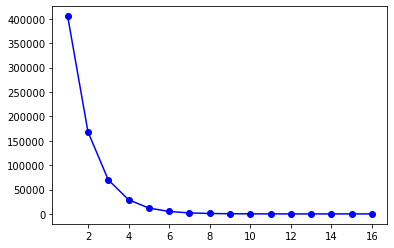

In [129]:
iterations = np.arange(1, len(cost_history)+1).tolist()
plt.plot(iterations, cost_history, color='blue', marker='o')
plt.show()

Can see that the best fit model is almost reached after 6th iteration itself. But took till 16 iterations to find the more better fit. 

### Time to test the model with the test data

Running prediction with the X_test data

In [130]:
y_test_predicted = []
for i in range(X_test.shape[0]):
    y_test_predicted.append(calculate_linear_eq(w, b, X_test[i]))

#### Plotting graph to see how the prediction 

plt.scatter(X_test, y_test, marker='x')
plt.plot(X_test, y_test_predicted, color='red')
plt.show()

Table below to list the predicted and actual value

In [133]:
predictions = pd.DataFrame({'Hours studied': X_test, 'Acutal Score': y_test, 'Predicted Score': y_test_predicted})
predictions         

,Hours studied,Acutal Score,Predicted Score
0,5.94,48.59,48.383545
1,7.23,57.92,55.379362
2,6.87,61.73,53.427041
3,3.02,32.50,32.548054
4,7.41,53.01,56.355522
5,3.14,33.17,33.198827
6,3.93,44.22,37.483087
7,7.72,60.24,58.036687
8,6.85,51.58,53.318579
9,8.64,65.78,63.025952


### Calculating the R2 (Accuracy) score for the model

Formula to calculate the R Squared is - 
1 - (Residual Sum of Squares / Total Sum of Squares)

Residual Sum of Squares = (Actual_Y - Predicted_Y) ** 2
Total Sum of Squares = (Actual_Y - Mean_Y) ** 2

In [134]:
ss_res = np.sum((y_test - y_test_predicted) ** 2)

In [135]:
ss_tot = np.sum((y_test - np.mean(y_test)) ** 2)

In [136]:
r_squared = 1 - (ss_res / ss_tot)
print(f"r_squared calculated out of the manual model fit = {r_squared}")

r_squared calculated out of the manual model fit = 0.9321715265297414


# Lets try fitting model for same data using sklearn Library

In [137]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [138]:
dataset = pd.read_csv('Rounded_Student_Hours_Studied_vs_Marks_Dataset.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [139]:
sklearn_lr_model = LinearRegression()

In [140]:
X_train_sklearn, X_test_sklearn, y_train_sklearn, y_test_sklearn = train_test_split(X, y, test_size=0.2, random_state=2)

In [141]:
X_train_sklearn.shape

(80, 1)

In [142]:
sklearn_lr_model.fit(X_train_sklearn, y_train_sklearn)

LinearRegression()

In [143]:
y_pred = sklearn_lr_model.predict(X_test_sklearn)

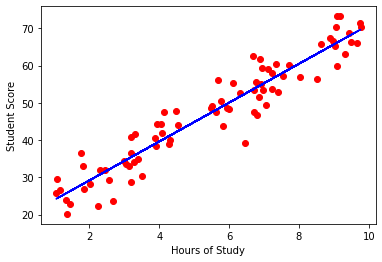

In [144]:
plt.scatter(X_train_sklearn, y_train_sklearn, color = 'red')
plt.plot(X_train_sklearn, sklearn_lr_model.predict(X_train_sklearn), color = 'blue')
plt.xlabel('Hours of Study')
plt.ylabel('Student Score')
plt.show()

In [145]:
w_sklearn = sklearn_lr_model.coef_
b_sklearn = sklearn_lr_model.intercept_
print(f"Coefficient as per sklearn model = {w_sklearn}, intercept = {b_sklearn}")

Coefficient as per sklearn model = [5.21886687], intercept = 18.753664274374675


In [146]:
r_squared = sklearn_lr_model.score(X_test_sklearn, y_test_sklearn)
r_squared

0.867192003571831